In [2]:
%matplotlib inline

import pandas
import pickle
import matplotlib.pyplot as plt
import numpy as np
from patsy import *
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
import scipy, scipy.stats
from math import *
import seaborn as sns


In [3]:
# Pickling functions
def pickle_it(data, filename):
    with open(filename, "wb") as picklefile:
        pickle.dump(data, picklefile)

def load_pickle(filename):
    with open(filename, "rb") as picklefile: 
        return pickle.load(picklefile)

In [4]:
d = load_pickle('fixyear.pkl')
len(d)

4151

**Scraped 4151 movies**

In [5]:
df = pandas.DataFrame(d)

In [6]:
df = pandas.DataFrame(d)
#print df.dtypes
print df.count()

Budget          767
Gross           424
Metascore       258
OpeningWkd      323
ReleaseDate    3189
Runtime        2742
Title          4151
Year           3838
dtype: int64


**.count() shows all the non NaN or NaT values for each column. if I'm to use all features 258 is max possible rows of data. Of course Metascore is not the only column so..**

In [16]:
cleandf = df[df['Year'] <= 2015].dropna().copy()
cleandf.sort('Year')
#1994 to 2015

,Budget,Gross,Metascore,OpeningWkd,ReleaseDate,Runtime,Title,Year
2678,45000000,422783777,83,16650343,1994-06-24,89,The Lion King,1994
1064,55000000,141600000,58,9423433,1995-06-23,81,Pocahontas,1995
999,30000000,186000,92,18210323,1995-11-22,81,Toy Story,1995
4109,12000000,63071133,64,20114233,1996-12-20,81,Beavis and Butt-Head Do America,1996
2643,2400000000,2298191,76,144446,1997-07-12,134,Princess Mononoke,1997
2390,53000000,5321922,59,120541,1997-11-21,94,Anastasia,1997
605,70000000,101217900,64,725559,1998-12-18,99,The Prince of Egypt,1998
664,120000000,34351136,77,291121,1998-11-25,95,A Bug's Life,1998
597,60000000,90646554,72,17195160,1998-10-02,83,Antz,1998
512,300000000,641760,35,31036678,1998-07-18,96,Pokémon: The First Movie - Mewtwo Strikes Back,1998


**..I end up with 183 movies**

**What does my data look like?**

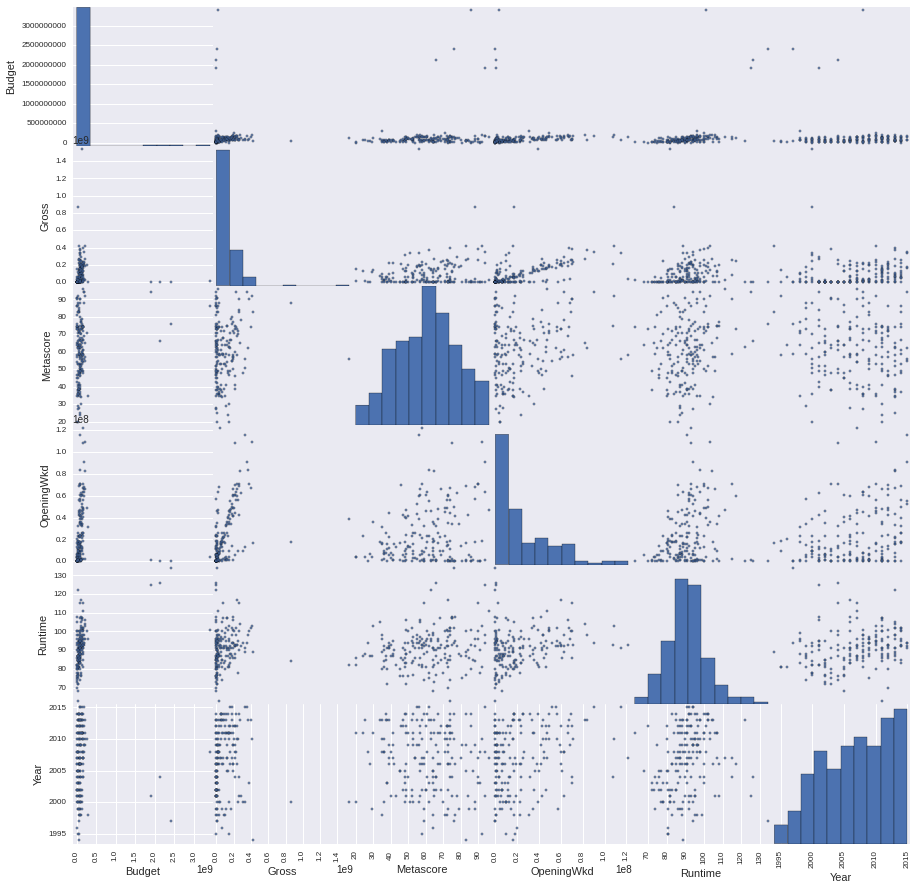

In [43]:
#cleandf_scattermatrix= sns.PairGrid(cleandf, size = 3, aspect = 1)
#cleandf_scattermatrix = cleandf_scattermatrix.map_offdiag(plt.scatter, edgecolor = 'w')
#cleandf_scattermatrix = cleandf_scattermatrix.map_diag(plt.hist)

pandas.tools.plotting.scatter_matrix(cleandf , alpha=0.79, figsize=(15,15), grid=True, diagonal='hist')
plt.savefig(r"clean_scattermatrix.png")

**Budget, Gross, OpeningWkd are very right skewed. Normalize with log!**

In [44]:
logcleandf = cleandf.copy()
logcleandf['Budget'] = logcleandf['Budget'].apply(lambda x: np.log(x))
logcleandf['Gross'] = logcleandf['Gross'].apply(lambda x: np.log(x))
logcleandf['OpeningWkd'] = logcleandf['OpeningWkd'].apply(lambda x: np.log(x))

In [45]:
logcleandf

,Budget,Gross,Metascore,OpeningWkd,ReleaseDate,Runtime,Title,Year
38,18.921456,19.059439,72,17.708121,2012-11-02,101,Wreck-It Ralph,2012
87,16.906553,13.816388,71,10.961017,2011-07-16,91,From Up on Poppy Hill,2011
104,18.826146,16.963822,61,17.960336,2008-11-07,89,Madagascar: Escape 2 Africa,2008
145,18.698312,18.238546,53,17.052126,2014-11-26,92,Penguins of Madagascar,2014
166,18.315320,19.096548,50,17.545781,2009-07-01,94,Ice Age: Dawn of the Dinosaurs,2009
196,17.479072,17.379048,74,16.250195,2012-10-05,87,Frankenweenie,2012
203,17.341871,8.316545,47,8.316545,2013-12-25,85,Thunder and the House of Magic,2013
213,17.822844,17.836347,38,16.575852,2013-11-01,91,Free Birds,2013
220,18.337299,19.381706,90,18.070664,2004-11-05,115,The Incredibles,2004
234,17.216708,17.099694,74,11.978978,2011-07-15,63,Winnie the Pooh,2011


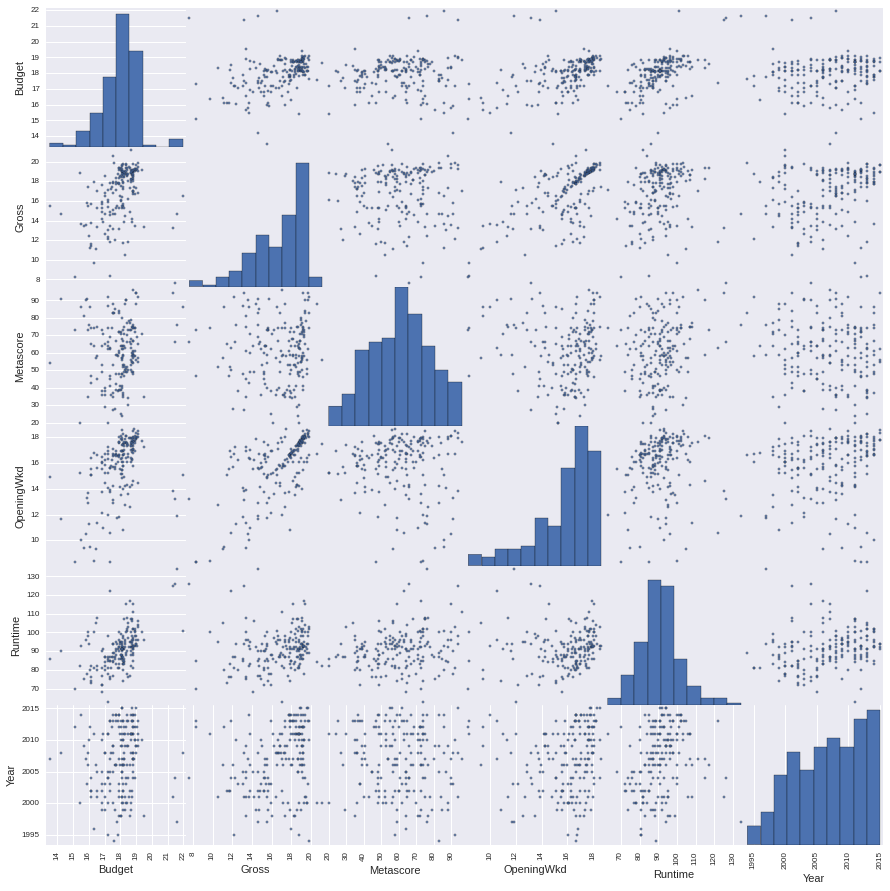

In [50]:
pandas.tools.plotting.scatter_matrix(logcleandf , alpha=0.79, figsize=(15,15), grid=True, diagonal='hist')
plt.show()
